<a href="https://colab.research.google.com/github/laistebas/projeto_doenca_cardiaca/blob/main/doenca_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre a classificação de doenças cardíacas.**

---


Base de dados: https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset/versions/2?resource=download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Carregando o dataset
dataset = pd.read_csv('/content/drive/MyDrive/Projetos/doenca_cardiaca.csv')
dataset.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
# Linhas e colunas
dataset.shape

(1319, 9)

In [ ]:
# Renomear as colunas
dataset.columns = ['Idade','Genero','Frequencia_cardiaca','Pressao_alta','Pressao_baixa','Glicose','Kcm','Troponina','Ataque_cardiaco']

In [ ]:
dataset.head()

,Idade,Genero,Frequencia_cardiaca,Pressao_alta,Pressao_baixa,Glicose,Kcm,Troponina,Ataque_cardiaco
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
# Resumo das variáveis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                1319 non-null   int64  
 1   Genero               1319 non-null   int64  
 2   Frequencia_cardiaca  1319 non-null   int64  
 3   Pressao_alta         1319 non-null   int64  
 4   Pressao_baixa        1319 non-null   int64  
 5   Glicose              1319 non-null   float64
 6   Kcm                  1319 non-null   float64
 7   Troponina            1319 non-null   float64
 8   Ataque_cardiaco      1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
# Atributo alvo: Ataque Cardiaco
# Substituir "positive" por 1 e "negative" por 0 na coluna "Ataque_cardiaco"
dataset["Ataque_cardiaco"] = dataset["Ataque_cardiaco"].replace({"positive": 1, "negative": 0})

In [ ]:
dataset.head()

,Idade,Genero,Frequencia_cardiaca,Pressao_alta,Pressao_baixa,Glicose,Kcm,Troponina,Ataque_cardiaco
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


Atributo alvo - Ataque cardiaco

# **Análise exploratória**

In [ ]:
# Verificando valores ausentes
dataset.isnull().sum()

Idade                  0
Genero                 0
Frequencia_cardiaca    0
Pressao_alta           0
Pressao_baixa          0
Glicose                0
Kcm                    0
Troponina              0
Ataque_cardiaco        0
dtype: int64

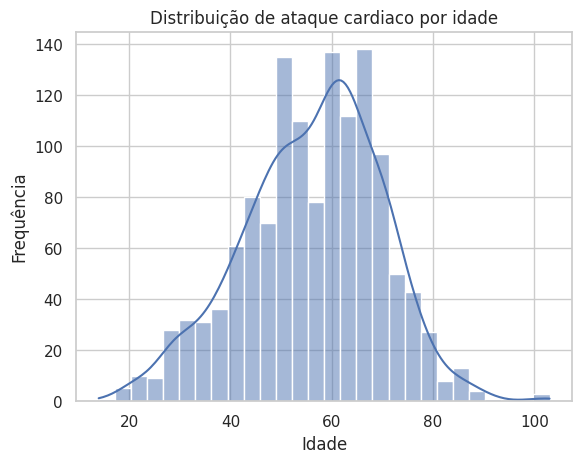

In [ ]:
# Estilo do histograma
custom_palette = sns.color_palette("RdBu_r", n_colors=10)
sns.set_palette(custom_palette)
sns.set(style="whitegrid")

# Histograma da variavél preditora
sns.histplot(data = dataset, x = "Idade", kde = True)

# Rótulos e Título
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição de ataque cardiaco por idade")

# Adicionar grade
plt.grid(True)

# Mostrar o gráfico
plt.show()

# **Preparação dos dados**

In [ ]:
# Preparando a variável de entrada em x
# Recebendo os dados em formato de matriz
x = np.array(dataset['Idade'])

In [ ]:
# Preparando a variável de entrada em y
# Recebendo os dados em formato de matriz
y = np.array(dataset['Ataque_cardiaco'])

In [ ]:
# tipo de formato
type(x)

numpy.ndarray

In [ ]:
# tipo de formato
type(y)

numpy.ndarray

In [ ]:
# Conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Instância do modelo de Regressão Logística
model = LogisticRegression()


In [ ]:
# Treinando o modelo nos dados de treinamento
model.fit(x_train,y_train)

LogisticRegression()

**Avaliando o modelo**

In [ ]:
# Previsão do conjunto de teste
y_pred = model.predict(x_test)

In [ ]:
# Métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de Confusão:\n", confusion)

Acurácia: 0.6666666666666666
Precisão: 0.6728110599078341
Recall: 0.8957055214723927
F1-score: 0.7684210526315788
Matriz de Confusão:
 [[ 30  71]
 [ 17 146]]


**Matriz de confusão**

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

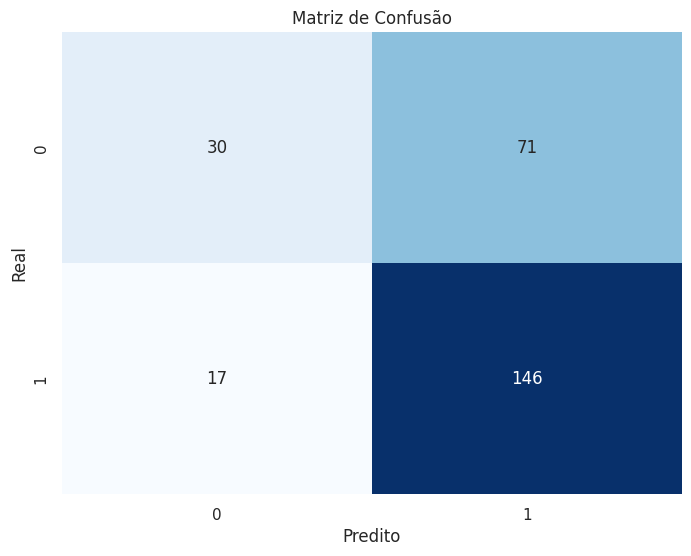

In [ ]:
# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**Curva ROC**

In [ ]:
# Probabilidades da classe positiva (classe 1)
y_prob = model.predict_proba(x_test)[:, 1]

In [ ]:
# Calculo da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [ ]:
# Calculo da área sob a curva ROC (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_prob)

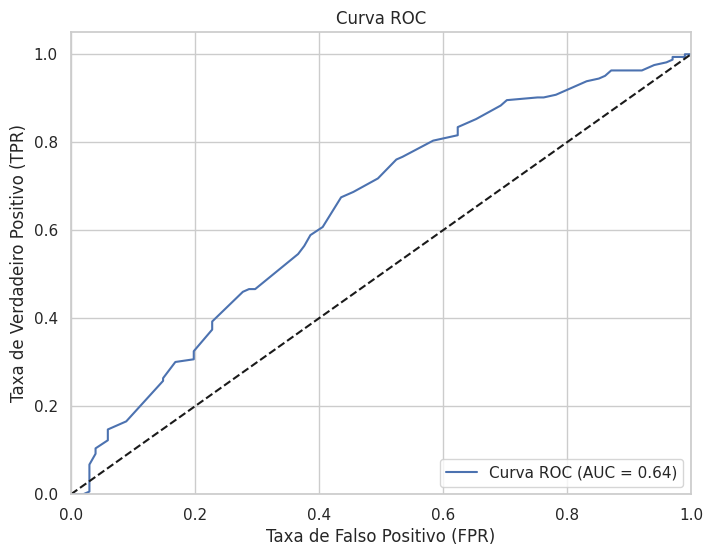

In [ ]:
# Gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()